# Setup


In [1]:
import numpy as np
import utils


## Loading the images


Reading image: images/input/thumbprint.png (962x1026)
Reading image: images/input/polymercell.png (648x702)


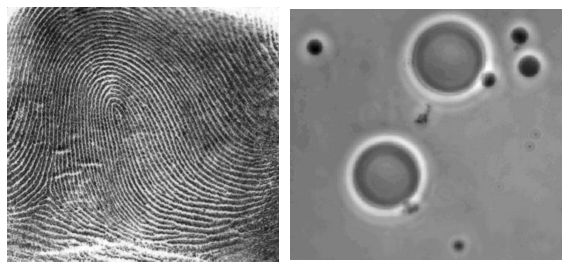

In [2]:
names = ["thumbprint", "polymercell"]
images = [utils.read_image(f"{name}.png") for name in names]
utils.show_images(images)


# Task 2a

Implement a function that implements Otsu’s algorithm for thresholding, and returns a single threshold value.


## Otsu's Algorithm:

1. Compute the normalized histogram of the input image. Denote the components of the histogram by $p_i$, $i=0,1,2,...,L-1$
2. Compute the cumulative sums $P_1(k)$ for $k=0,1,2,...,L-1$ using:
   $$P_1(k)=\sum_{i=0}^{k}p_i$$
3. Compute the cumulative means $m(k)$ for $k=0,1,2,...,L-1$ using:
   $$m_k(k)=\sum_{i=0}^{k}ip_i$$
4. Compute the global mean $m_G$ using:
   $$m_G=\sum_{i=0}^{L-1}ip_i=m_k(L-1)$$
5. Compute the between-class variance term $\sigma^2_B(k)$ for $k=0,1,2,...,L-1$ using:
   $$\sigma^2_B(k)=\frac{[m_GP_1(k)-m_k(k)]^2}{P_1(k)[1-P_1(k)]}$$
6. Obtain Otsu threshold $k^*$ as the value of $k$ for which $\sigma^2_B(k)$ is maximum. If the maximum is not unique, obtain $k^*$ by averaging the values of $k$ corresponsing to the various maxima detected.
7. Compute the global variance $\sigma^2_G$ using:
   $$\sigma^2_G=\sum_{i=0}^{L-1}(i-m_G)^2P_i$$
   and then obtain the separability measure $\eta^*$ by evaluating:
   $$\eta(k^*)=\frac{\sigma^2_B(k^*)}{\sigma^2_G}$$


In [3]:
def otsu_thresholding(image: np.ndarray) -> int:
    assert image.dtype == np.uint8
    L = 256  # each pixel can have 256 different values

    rows, columns = image.shape
    num_pixels = rows * columns

    # Step 1
    normalized_histogram = np.zeros(L)
    for row in range(rows):
        for column in range(columns):
            normalized_histogram[image[row, column]] += 1 / num_pixels

    # Step 2
    cumulative_sums = np.zeros(L)
    cumulative_sums[0] = normalized_histogram[0]
    for i in range(1, L):
        cumulative_sums[i] = cumulative_sums[i - 1] + normalized_histogram[i]

    # Step 3
    cumulative_means = np.zeros(L)
    for i in range(1, L):
        cumulative_means[i] = cumulative_means[i - 1] + (i * normalized_histogram[i])

    # Step 4
    global_mean = cumulative_means[L - 1]

    # Step 5
    between_class_variance = np.zeros(L)
    for i in range(L):
        numerator = (global_mean * cumulative_sums[i] - cumulative_means[i]) ** 2
        denominator = cumulative_sums[i] * (1 - cumulative_sums[i])

        if denominator == 0:
            between_class_variance[i] = 0
        else:
            between_class_variance[i] = numerator / denominator

    # Step 6
    max_variance = max(between_class_variance)
    indices = np.where(between_class_variance == max_variance)[0]
    threshold = round(sum(indices) / len(indices))

    # Step 7
    global_variance = 0
    for i in range(L):
        global_variance += (i - global_mean) ** 2 * normalized_histogram[i]
    separability_measure = between_class_variance[threshold] / global_variance

    return threshold, separability_measure


## Testing the function on the images


Otsu's Algorithm for "thumbprint": 
          Threshold    = 153 
          Separability = 0.701
Saving image to: images/output/task2a-thumbprint.png


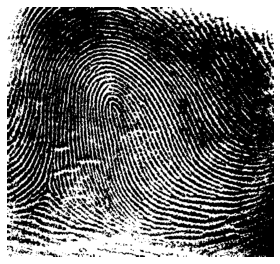

Otsu's Algorithm for "polymercell": 
          Threshold    = 181 
          Separability = 0.466
Saving image to: images/output/task2a-polymercell.png


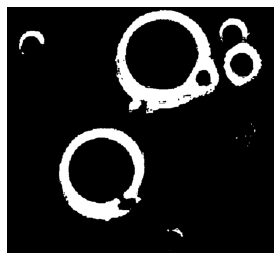

In [4]:
for image, name in zip(images, names):

    threshold, separability_measure = otsu_thresholding(image)
    print(
        f"""Otsu's Algorithm for \"{name}\": 
          Threshold    = {threshold} 
          Separability = {separability_measure:.3f}"""
    )

    segmented_image = image >= threshold

    assert (
        segmented_image.shape == image.shape
    ), f"Expected image shape ({image.shape}) to be same as threshold image shape ({segmented_image.shape})"
    assert (
        segmented_image.dtype == np.bool
    ), f"Expected threshold image dtype to be np.bool. Was: {segmented_image.dtype}"

    utils.show_image(segmented_image, save_as=f"task2a-{name}.png")
